# Linear Regression

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

### Example: Advertising Data

In [2]:
# read data into a DataFrame
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
data.head()

TV  Radio  Newspaper  Sales
1  230.1   37.8       69.2   22.1
2   44.5   39.3       45.1   10.4
3   17.2   45.9       69.3    9.3
4  151.5   41.3       58.5   18.5
5  180.8   10.8       58.4   12.9

In [3]:
# print the shape of the DataFrame
data.shape

(200, 4)

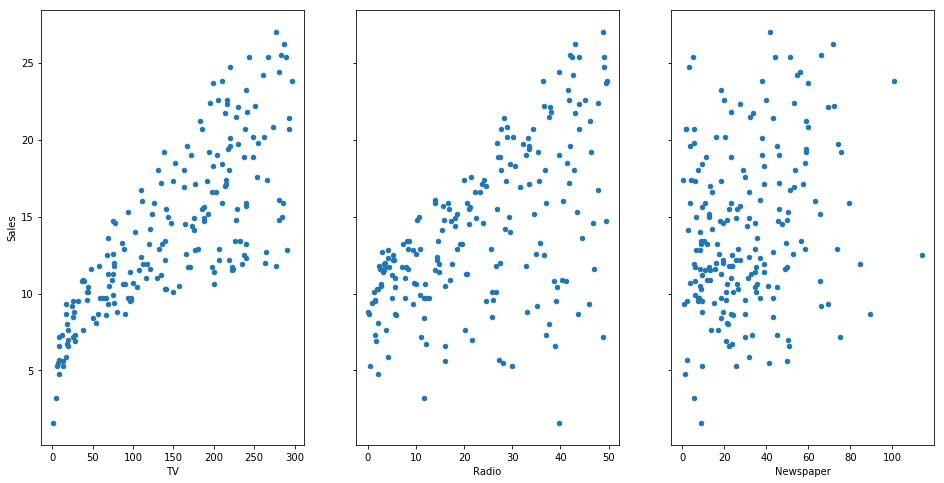

In [4]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 3, sharey=True)
data.plot(kind='scatter', x='TV', y='Sales', ax=axs[0], figsize=(16, 8))
data.plot(kind='scatter', x='Radio', y='Sales', ax=axs[1])
data.plot(kind='scatter', x='Newspaper', y='Sales', ax=axs[2])

### Questions About the Advertising Data
Let's pretend you work for the company that manufactures and markets this widget. The company might ask you the following: 
On the basis of this data, how should we spend our advertising money in the future?

This general question might lead you to more specific questions:

1. Is there a relationship between ads and sales?
2. How strong is that relationship?
3. Which ad types contribute to sales?
4. What is the effect of each ad type of sales?
5. Given ad spending in a particular market, can sales be predicted?
6. We will explore these questions below!

### Simple Linear Regression
Simple linear regression is an approach for predicting a quantitative response using a single feature (or "predictor" or "input variable"). It takes the following form:
$y = \beta_0 + \beta_1x$

Let's use Statsmodels to estimate the model coefficients for the advertising data:

In [5]:
import statsmodels.formula.api as smf

# create a fitted model in one line 
#ols stands for Ordinary Least Squares 
lm = smf.ols(formula='Sales ~ TV', data=data).fit()

# print the coefficients
lm.params

Intercept    7.032594
TV           0.047537
dtype: float64

### Interpreting Model Coefficients
How do we interpret the TV coefficient ($\beta_1$)?
A "unit" increase in TV ad spending is associated with a 0.047537 "unit" increase in Sales.
Or more clearly: 

- An additional $1,000$ spent on TV ads is associated with an increase in sales of 47.537 widgets.

- Note that if an increase in TV ad spending was associated with a decrease in sales, $\beta_1$ would be negative.

### Using the Model for Prediction
Let's say that there was a new market where the TV advertising spend was 
50,000. What would we predict for the Sales in that market?


In [6]:
# you have to create a DataFrame since the Statsmodels formula interface expects it
X_new = pd.DataFrame({'TV': [50]})
X_new.head()

TV
0  50

In [7]:
# use the model to make predictions on a new value
lm.predict(X_new)

array([ 9.40942557])

### Plotting the Least Squares Line
Let's make predictions for the smallest and largest observed values of x, and then use the predicted values to plot the least squares line:


In [8]:
# create a DataFrame with the minimum and maximum values of TV
X_new = pd.DataFrame({'TV': [data.TV.min(), data.TV.max()]})
X_new.head()

TV
0    0.7
1  296.4

In [9]:
# make predictions for those x values and store them
preds = lm.predict(X_new)
preds

array([  7.0658692 ,  21.12245377])

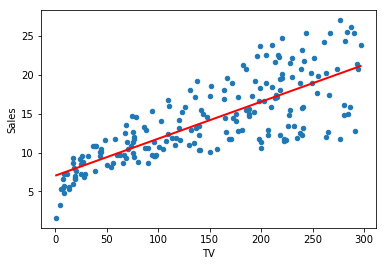

In [10]:
# first, plot the observed data
data.plot(kind='scatter', x='TV', y='Sales')

# then, plot the least squares line
plt.plot(X_new, preds, c='red', linewidth=2)

### Confidence in our Model
Question: Is linear regression a high bias/low variance model, or a low bias/high variance model?
    
Answer: High bias/low variance. Under repeated sampling, the line will stay roughly in the same place (low variance), but the average of those models won't do a great job capturing the true relationship (high bias). Note that low variance is a useful characteristic when you don't have a lot of training data!

    
A closely related concept is confidence intervals. Statsmodels calculates 95% confidence intervals for our model coefficients, which are interpreted as follows: If the population from which this sample was drawn was sampled 100 times, approximately 95 of those confidence intervals would contain the "true" coefficient.

In [11]:
# print the confidence intervals for the model coefficients
lm.conf_int()

0         1
Intercept  6.129719  7.935468
TV         0.042231  0.052843

Keep in mind that we only have a single sample of data, and not the entire population of data. The "true" coefficient is either within this interval or it isn't, but there's no way to actually know. We estimate the coefficient with the data we do have, and we show uncertainty about that estimate by giving a range that the coefficient is probably within.

Note that using 95% confidence intervals is just a convention. You can create 90% confidence intervals (which will be more narrow), 99% confidence intervals (which will be wider), or whatever intervals you like.

### Hypothesis Testing and p-values
Closely related to confidence intervals is hypothesis testing. Generally speaking, you start with a null hypothesis and an alternative hypothesis (that is opposite the null). Then, you check whether the data supports rejecting the null hypothesis or failing to reject the null hypothesis.

(Note that "failing to reject" the null is not the same as "accepting" the null hypothesis. The alternative hypothesis may indeed be true, except that you just don't have enough data to show that.)

As it relates to model coefficients, here is the conventional hypothesis test:
- null hypothesis: There is no relationship between TV ads and Sales (and thus $\beta_1$ equals zero)
- alternative hypothesis: There is a relationship between TV ads and Sales (and thus $\beta_1$ is not equal to zero)

How do we test this hypothesis? Intuitively, we reject the null (and thus believe the alternative) if the 95% confidence interval does not include zero. Conversely, the p-value represents the probability that the coefficient is actually zero:

In [12]:
# print the p-values for the model coefficients
lm.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

If the 95% confidence interval includes zero, the p-value for that coefficient will be greater than 0.05. If the 95% confidence interval does not include zero, the p-value will be less than 0.05. Thus, a p-value less than 0.05 is one way to decide whether there is likely a relationship between the feature and the response. (Again, using 0.05 as the cutoff is just a convention.)

In this case, the p-value for TV is far less than 0.05, and so we believe that there is a relationship between TV ads and Sales.

Note that we generally ignore the p-value for the intercept.

### How Well Does the Model Fit the data?

The most common way to evaluate the overall fit of a linear model is by the R-squared value. R-squared is the proportion of variance explained, meaning the proportion of variance in the observed data that is explained by the model, or the reduction in error over the null model. (The null model just predicts the mean of the observed response, and thus it has an intercept and no slope.)

R-squared is between 0 and 1, and higher is better because it means that more variance is explained by the model. 

In [13]:
# print the R-squared value for the model
lm.rsquared

0.61187505085007099

Is that a "good" R-squared value? It's hard to say. The threshold for a good R-squared value depends widely on the domain. Therefore, it's most useful as a tool for comparing different models.

## Multiple Linear Regression
Simple linear regression can easily be extended to include multiple features. This is called multiple linear regression:

$y = \beta_0 + \beta_1x_1 + ... + \beta_nx_n$

Each $x$ represents a different feature, and each feature has its own coefficient. In this case:

$y = \beta_0 + \beta_1 \times TV + \beta_2 \times Radio + \beta_3 \times Newspaper$

Let's use Statsmodels to estimate these coefficients:

In [14]:
# create a fitted model with all three features
lm = smf.ols(formula='Sales ~ TV + Radio + Newspaper', data=data).fit()

# print the coefficients
lm.params

Intercept    2.938889
TV           0.045765
Radio        0.188530
Newspaper   -0.001037
dtype: float64

In [15]:
# print a summary of the fitted model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Fri, 19 May 2017   Prob (F-statistic):           1.58e-96
Time:                        16:50:51   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000         2.324     3.554
TV             0.0458      0.001     32.809      0.000         0.043     0.049
Radio          0.1885      0.009     21.893      0.000         0.172     0.206
Newspaper     -0.0010      0.006     -0.177      0.860        -0.013     0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

What are a few key things we learn from this output?

- TV and Radio have significant p-values, whereas Newspaper does not. Thus we reject the null hypothesis for TV and Radio (that there is no association between those features and Sales), and fail to reject the null hypothesis for Newspaper.
- TV and Radio ad spending are both positively associated with Sales, whereas Newspaper ad spending is slightly negatively associated with Sales. (However, this is irrelevant since we have failed to reject the null hypothesis for Newspaper.)
- This model has a higher R-squared (0.897) than the previous model, which means that this model provides a better fit to the data than a model that only includes TV.